<a href="https://colab.research.google.com/github/Thippawan72/BSC_DPDM23/blob/main/Classificationmin__impurity_decrease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3

ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้ และ มาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร

- แถว 4 min_impurity_decrease

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loading data file
credit = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23_Data/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

In [6]:
credit = credit[['a9','a10','a12','a13','a16']]

In [7]:
credit.head()

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1


In [8]:
np.random.seed(seed=1)

In [9]:
a = np.random.randint(2, size=len(credit))

In [10]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [11]:
train = credit[a == 1]
train.shape

(324, 5)

In [12]:
balance_data = credit[a == 0]
balance_data.shape

(366, 5)

In [13]:
#Seperating the Target variable
X = balance_data.values[:,:-1]
Y = balance_data.values [:,-1]

In [14]:
#Splitinq Dataset into Test and Train
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size= 0.3, random_state= 100)

In [15]:
clf_entropy= DecisionTreeClassifier (criterion = "entropy", random_state= 100,max_depth=3)
clf_entropy.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [16]:
#FunctiontomakePredictions
y_pred_en = clf_entropy.predict (x_test)
print(y_pred_en)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0]


In [17]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_en)*100)

Accuracy is  88.18181818181819


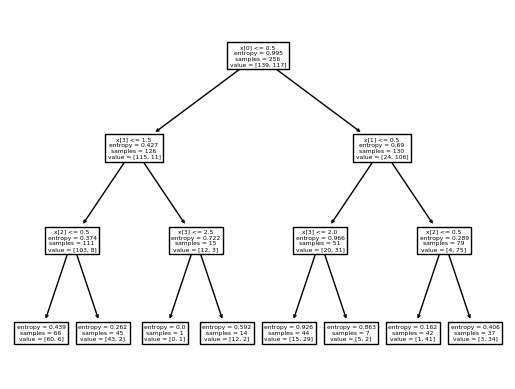

In [18]:
tree.plot_tree(clf_entropy);

In [19]:
#Function to perform training with Entropy
clf_entropy1= DecisionTreeClassifier (criterion = "entropy", random_state= 100,max_depth=2, min_samples_leaf=4)
clf_entropy1.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=4,
                       random_state=100)

In [20]:
#FunctiontomakePredictions
y_pred_en1 = clf_entropy1.predict (x_test)
print(y_pred_en1)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [21]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_en1)*100)

Accuracy is  89.0909090909091


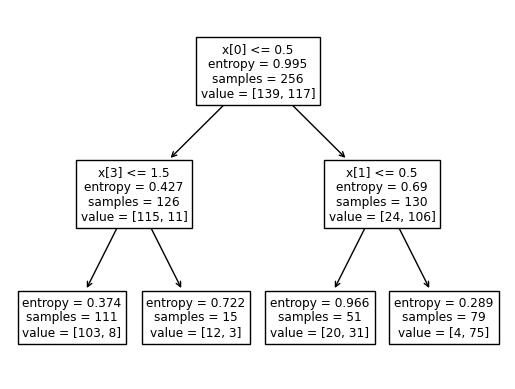

In [22]:
tree.plot_tree(clf_entropy1);

## Set parameter use min_impurity_decrease

In [23]:
Clf_min_impurity1 = DecisionTreeClassifier(min_impurity_decrease=0.001)

In [24]:
Clf_min_impurity1.fit(x_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.001)

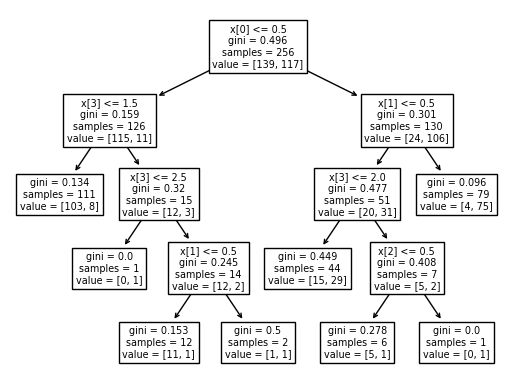

In [25]:
tree.plot_tree(Clf_min_impurity1);

In [26]:
y_pred_mpd1 = Clf_min_impurity1.predict (x_test)
print(y_pred_mpd1)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [27]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_mpd1)*100)

Accuracy is  88.18181818181819


###ลองทำต้นที่ 2




In [53]:
Clf_min_impurity2 = DecisionTreeClassifier(random_state=100, min_impurity_decrease=0.10, max_depth=3)

In [54]:
Clf_min_impurity2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.1, random_state=100)

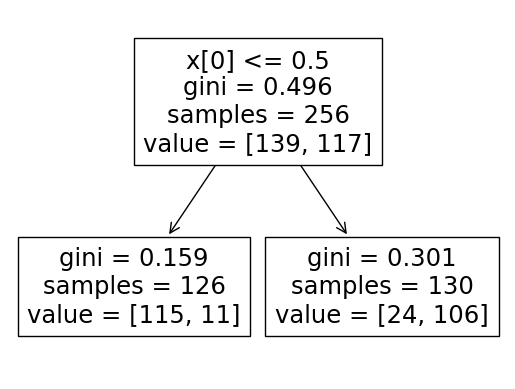

In [55]:
tree.plot_tree(Clf_min_impurity2);

In [56]:
y_pred_mpd2 = Clf_min_impurity2.predict (x_test)
print(y_pred_mpd2)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [59]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_mpd2)*100)

Accuracy is  89.0909090909091


###ลองทำต้นที่ 3


In [62]:
Clf_min_impurity3 = DecisionTreeClassifier(criterion = "entropy", random_state=0, min_impurity_decrease=0.006, max_depth=2)

In [63]:
Clf_min_impurity3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2,
                       min_impurity_decrease=0.006, random_state=0)

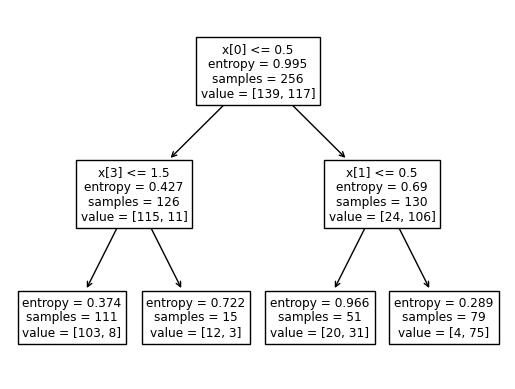

In [64]:
tree.plot_tree(Clf_min_impurity3);

In [65]:
y_pred_mpd3 = Clf_min_impurity3.predict (x_test)
print(y_pred_mpd3)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [66]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_mpd3)*100)

Accuracy is  89.0909090909091


###ลองทำต้นที่4

In [67]:
Clf_min_impurity4= DecisionTreeClassifier (criterion = "entropy", random_state= 100, min_impurity_decrease=0.02, min_samples_leaf=2, max_depth=2)

In [68]:
Clf_min_impurity4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2,
                       min_impurity_decrease=0.02, min_samples_leaf=2,
                       random_state=100)

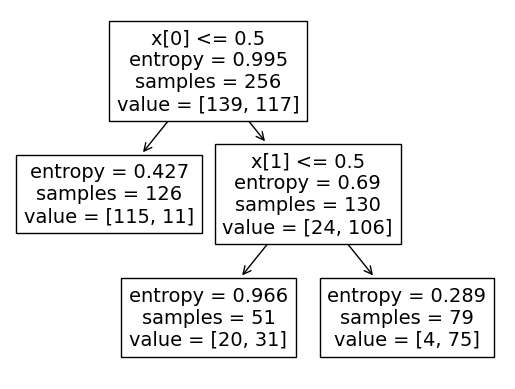

In [69]:
tree.plot_tree(Clf_min_impurity4);

In [70]:
y_pred_mpd4 = Clf_min_impurity4.predict (x_test)
print(y_pred_mpd4)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [71]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_mpd4)*100)

Accuracy is  89.0909090909091
